In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.output {font-size:10pt}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
</style>
"""))

# tensorflow v2.x에서 v1버전 사용하기

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2 사용 중지시키기 

In [5]:
# tensor = data(상수,변수), 연산 
# node1 상수 tensor 선언 
node1 = tf.constant('Hello, Tensorflow')

# graph(computational graph) 생성 
sess = tf.Session()

# print(node1) (tensor에 있는 아이를 가져오려면 이렇게 출력하면 안된다.)
print(sess.run(node1))
print(sess.run(node1).decode())

# 결과에 출력된 b는 'byte literal'를 의미 

b'Hello, Tensorflow'
Hello, Tensorflow


In [6]:
# 간단한 수학 연산 수행(computational graph)
node1 = tf.constant(10, dtype=tf.float32) # dtype의 default는 int 
node2 = tf.constant(20, dtype=tf.float32)
node3 = tf.add(node1, node2) # node3 = node1 + node2 

# computational graph 실행 
sess = tf.Session()
print(sess.run([node1, node2, node3])) # 여러개의 node값 한번에 실행하기

[10.0, 20.0, 30.0]


**<font size='3'>Tensorflow</font>**
<ol>
    <li>그래프 정의</li>
    <li>sess = if.Session() 실행</li>
    <li>sess.run()을 통해 값 확인</li>
</ol>

In [7]:
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32) # cast(); 형변환 

sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [8]:
data = [1., 2., 3., 4.]

m = tf.reduce_mean(data) # reduce_mean(); 평균값 
sess = tf.Session()
print(sess.run(m))

2.5


# tensorflow v1을 이용한<br> linear regression구현

## 독립변수 x가 한 개일 때

In [9]:
# <tensor graph 정의하기>

# train data set 
x = [1, 2, 3] # x = np.array([1, 2, 3])
y = [1, 2, 3] # y = np.array([1, 2, 3])

# Weight & bias (처음엔 랜덤으로 값을 지정, 학습 과정에서 값이 변경될 예정)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 목적: cost 함수가 최소가 되는 W와 b의 값 찾기 
"""cost함수는 제곱의 평균인 2차 함수이므로 곡선이다.
   곡선 위의 미분값이 줄어드는 방향으로 학습시킨다."""
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
                            # learning_rate= ; 얼마씩 줄여갈지 설정
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화 
sess.run(tf.global_variables_initializer())

# 6000회 학습 (tensorflow v2, fit() 함수)
"""
for step in range(1, 6001):
    sess.run(train)
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step, 
                        sess.run(cost), sess.run(W), sess.run(b)))
"""
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step, cost_val,
                                                 W_val, b_val))

300번째 cost:0.03809570521116257, W값:[0.77385414], b값:[0.5140827]
600번째 cost:0.008989047259092331, W값:[0.89014816], b값:[0.24971913]
900번째 cost:0.0021210522390902042, W값:[0.94663876], b값:[0.12130269]
1200번째 cost:0.0005004803533665836, W값:[0.97407943], b값:[0.05892355]
1500번째 cost:0.0001180933031719178, W값:[0.9874089], b값:[0.02862244]
1800번째 cost:2.7864958610734902e-05, W값:[0.9938838], b값:[0.01390349]
2100번째 cost:6.574860890395939e-06, W값:[0.99702907], b값:[0.00675365]
2400번째 cost:1.5513102198383422e-06, W값:[0.99855685], b값:[0.00328063]
2700번째 cost:3.662073595478432e-07, W값:[0.9992988], b값:[0.00159389]
3000번째 cost:8.654063066160234e-08, W값:[0.9996591], b값:[0.00077476]
3300번째 cost:2.0490501739800493e-08, W값:[0.9998341], b값:[0.00037711]
3600번째 cost:4.872056980076422e-09, W값:[0.99991906], b값:[0.00018377]
3900번째 cost:1.1558882739848286e-09, W값:[0.9999606], b값:[8.9659065e-05]
4200번째 cost:2.784479036233023e-10, W값:[0.99998075], b값:[4.4038094e-05]
4500번째 cost:6.511233913153447e-11, W값:[0.9999906], 

In [14]:
sess.run([W,b])

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [15]:
W_, b_ = sess.run([W, b])

In [17]:
print('최종적으로 나온 회귀식: H={}*x + {}'.format(W_[0], b_[0]))

최종적으로 나온 회귀식: H=0.9999977350234985*x + 4.490227638598299e-06


In [18]:
# <tensor graph 정의하기>

# train data set 
x = [1, 2, 3] # x = np.array([1, 2, 3])
y = [1, 2, 3] # y = np.array([1, 2, 3])

# Weight & bias (처음엔 랜덤으로 값을 지정, 학습 과정에서 값이 변경될 예정)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 목적: cost 함수가 최소가 되는 W와 b의 값 찾기 
"""cost함수는 제곱의 평균인 2차 함수이므로 곡선이다.
   곡선 위의 미분값이 줄어드는 방향으로 학습시킨다."""
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화 
sess.run(tf.global_variables_initializer())

# 4000회 학습 (tensorflow v2, fit() 함수)
for step in range(1, 4001):
    W_val, b_val = sess.run([W, b])
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step, cost_val,
                                                 W_val, b_val))
    sess.run(train)

300번째 cost:3.243232722313638e-12, W값:[1.0359994], b값:[-0.08183521]
600번째 cost:3.243232722313638e-12, W값:[1.0174869], b값:[-0.039752]
900번째 cost:3.243232722313638e-12, W값:[1.0084944], b값:[-0.01930978]
1200번째 cost:3.243232722313638e-12, W값:[1.0041262], b값:[-0.00937975]
1500번째 cost:3.243232722313638e-12, W값:[1.0020045], b값:[-0.00455664]
1800번째 cost:3.243232722313638e-12, W값:[1.0009742], b값:[-0.00221433]
2100번째 cost:3.243232722313638e-12, W값:[1.0004737], b값:[-0.00107706]
2400번째 cost:3.243232722313638e-12, W값:[1.0002307], b값:[-0.00052469]
2700번째 cost:3.243232722313638e-12, W값:[1.0001128], b값:[-0.0002559]
3000번째 cost:3.243232722313638e-12, W값:[1.0000557], b값:[-0.00012562]
3300번째 cost:3.243232722313638e-12, W값:[1.0000266], b값:[-6.0417173e-05]
3600번째 cost:3.243232722313638e-12, W값:[1.0000137], b값:[-3.0607698e-05]
3900번째 cost:3.243232722313638e-12, W값:[1.0000082], b값:[-1.7771283e-05]


## predict를 하기 위한 placeholder 이용 

In [19]:
# placeholder 이용 
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
ab = tf.add(a, b) # ab = a + b 

sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [20]:
sess.run(ab, feed_dict={a : [1, 2, 3], 
                        b : [10, 10, 10]})
            # feed_dict={ }; 특정 값 할당하기

array([11., 12., 13.], dtype=float32)

In [21]:
sess.run(ab, feed_dict={a : np.array([1, 2, 3]), 
                        b : np.array([10, 10, 10])})

array([11., 12., 13.], dtype=float32)

In [23]:
# 그래프 실행 단계에서 값 던져주기 
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_note = node1 + node2 

sess = tf.Session()
result = sess.run(adder_note, feed_dict={node1: input("node1값: "),
                                         node2: input("node2값: ")})
print(result)

node1값: 10
node2값: 20
30.0


In [24]:
# training data set (H = 2x + 3)
x_data = [1, 2, 3]
y_data = [5, 7, 9]

# placeholder 설정 
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias 
W = tf.Variable(tf.random_normal([1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사 하강법(GradientDescentOptimizer)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                 feed_dict={x:x_data, y:y_data})
    if step%300 == 0:
        print("{}번째: cost-{}, W-{}, b-{}".format(step, cost_val,
                                                W_val, b_val))

300번째: cost-0.02330508641898632, W-[2.176879], b-[2.5979123]
600번째: cost-0.005499143153429031, W-[2.0859208], b-[2.8046823]
900번째: cost-0.0012975538847967982, W-[2.0417364], b-[2.9051237]
1200번째: cost-0.0003061626630369574, W-[2.0202737], b-[2.9539135]
1500번째: cost-7.224673026939854e-05, W-[2.0098479], b-[2.977613]
1800번째: cost-1.704744681774173e-05, W-[2.004784], b-[2.9891248]
2100번째: cost-4.024565441795858e-06, W-[2.0023243], b-[2.9947162]
2400번째: cost-9.523288895252335e-07, W-[2.0011306], b-[2.99743]
2700번째: cost-2.2625954443356022e-07, W-[2.000551], b-[2.9987473]
3000번째: cost-5.4236505064864104e-08, W-[2.0002694], b-[2.9993865]
3300번째: cost-1.3248079078209685e-08, W-[2.0001335], b-[2.9996974]
3600번째: cost-3.024145600605266e-09, W-[2.0000634], b-[2.9998553]
3900번째: cost-7.46164630083257e-10, W-[2.0000322], b-[2.9999278]
4200번째: cost-4.848364487664014e-10, W-[2.000026], b-[2.999942]
4500번째: cost-4.848364487664014e-10, W-[2.000026], b-[2.999942]
4800번째: cost-4.848364487664014e-10, W-[

In [25]:
sess.run([W, b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [26]:
# 예측하기 
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [27]:
sess.run(H, feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## scale이 다른 데이터들의 linear regression 구현

In [31]:
# <data scale이 다르면 학습 결과가 어떻게 나타날까?> 

# train data set 
x_data = [1, 2, 5, 8, 10]
y_data = [5, 15, 68, 80, 95]

# placeholder
x = tf.placeholder(dtype=tf.float32, shape=None)
y = tf.placeholder(dtype=tf.float32, shape=None)
                        # shape=None: 어떤 형태의 shape이든 들어올 수 있음
# Weight & bias 
W = tf.Variable(tf.random_normal([1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & Variable 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
for step in range(1, 6001):
    _, cost_val, W_val = sess.run([train, cost, W], 
                                 feed_dict={x:x_data, y:y_data})
    if step%300 == 0:
        print("{}번째 cost-{}, W-{}".format(step, cost_val, W_val))

300번째 cost-79.15555572509766, W-[10.1289215]
600번째 cost-79.13990783691406, W-[10.154706]
900번째 cost-79.13948822021484, W-[10.159004]
1200번째 cost-79.13945770263672, W-[10.15972]
1500번째 cost-79.13944244384766, W-[10.159841]
1800번째 cost-79.13946533203125, W-[10.15986]
2100번째 cost-79.13944244384766, W-[10.1598625]
2400번째 cost-79.13946533203125, W-[10.1598625]
2700번째 cost-79.13946533203125, W-[10.1598625]
3000번째 cost-79.13946533203125, W-[10.1598625]
3300번째 cost-79.13946533203125, W-[10.1598625]
3600번째 cost-79.13946533203125, W-[10.1598625]
3900번째 cost-79.13946533203125, W-[10.1598625]
4200번째 cost-79.13946533203125, W-[10.1598625]
4500번째 cost-79.13946533203125, W-[10.1598625]
4800번째 cost-79.13946533203125, W-[10.1598625]
5100번째 cost-79.13946533203125, W-[10.1598625]
5400번째 cost-79.13946533203125, W-[10.1598625]
5700번째 cost-79.13946533203125, W-[10.1598625]
6000번째 cost-79.13946533203125, W-[10.1598625]


In [32]:
sess.run([W,b])

[array([10.1598625], dtype=float32), array([-0.23128368], dtype=float32)]

In [33]:
# 예측 가능하지만, cost값이 너무 커서 신뢰할 수 없다. 
sess.run(H, feed_dict={x:10})

array([101.36734], dtype=float32)

In [ ]:
"""
예측이 제대로 되지 않는 이유: 
    GradientDescentOptimizer에서 local최소값을 만나면
    global 최소값이 따로 있어도 멈춘다.
"""

## 독립변수가 여러개일 때 

In [35]:
# training data set 
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])
# x_data = [[73,80,75],
#           [93,88,93],
#           [89,91,90],
#           [96,98,100],
#           [73,66,70]]
# y_data = [[152],[185],[180],[196],[142]]

# placeholder  
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias 
W = tf.Variable(tf.random.normal([3,1]), name='Weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = tf.matmul(X, W) + b # 행렬의 곱  H = X @ W + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train (경사하강법)
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# Session & Variable 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], 
                          feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:12.533061027526855
6000번째 cost:2.7006354331970215
9000번째 cost:0.7535428404808044
12000번째 cost:0.3593690097332001
15000번째 cost:0.27221518754959106
18000번째 cost:0.24675604701042175
21000번째 cost:0.23457011580467224
24000번째 cost:0.22595545649528503
27000번째 cost:0.2188839465379715
30000번째 cost:0.21283037960529327
33000번째 cost:0.20763273537158966
36000번째 cost:0.20312456786632538
39000번째 cost:0.19923783838748932
42000번째 cost:0.1958637684583664
45000번째 cost:0.19294768571853638
48000번째 cost:0.19042253494262695
51000번째 cost:0.18823452293872833
54000번째 cost:0.18634726107120514
57000번째 cost:0.1847022920846939
60000번째 cost:0.1832733154296875


# 예제 - 'Ozone량  예측하기'

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np 
import pandas as pd # 결측치 처리 

In [11]:
# <training data set> 
#  : data load -> 결측치 처리 -> 독립변수, 종속변수 분리 
data = pd.read_csv('./data/ozone.csv', sep=',') # data load 

data = data.dropna(how='any') # 결측치가 한 열이라도 있는 행의 전체를 제거
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']] # 필요한 column만 추출 

x_data = data[['Solar.R', 'Wind', 'Temp']].values 
                                # DataFrame -> Numpy Array
y_data = data[['Ozone']].values.reshape(-1,1) 
                                # -1:None / 시리즈를 2차원으로
x_data.shape, y_data.shape

# <tensorflow 구현>
# 1. placeholder 
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 
W = tf.Variable(tf.random_normal([3,1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 3. Hypothesis 
H = tf.matmul(X, W) + b 

# 4. cost 함수 
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. Session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습 
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost: {}".format(step, cost_val))
        
        # (cost값이 커서 예측하는 의미가 별로 없다.)

3000번째 cost: 495.75042724609375
6000번째 cost: 467.73004150390625
9000번째 cost: 464.4232177734375
12000번째 cost: 464.0105895996094
15000번째 cost: 463.9368591308594
18000번째 cost: 463.90289306640625
21000번째 cost: 463.8736267089844
24000번째 cost: 463.84490966796875
27000번째 cost: 463.81634521484375
30000번째 cost: 463.7877502441406
33000번째 cost: 463.75921630859375
36000번째 cost: 463.7306823730469
39000번째 cost: 463.7021484375
42000번째 cost: 463.67364501953125
45000번째 cost: 463.6451721191406
48000번째 cost: 463.6167297363281
51000번째 cost: 463.58837890625
54000번째 cost: 463.5599670410156
57000번째 cost: 463.5317077636719
60000번째 cost: 463.5032958984375


In [14]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [10]:
sess.run(H, feed_dict={X:np.array([[118,8,72]])})

array([[41.62213]], dtype=float32)

In [16]:
# scale 맞추는 방법 : normalization(많이 씀), standardization(표준화)

#                   X - Xmin
# normalization = ──────────────
#                  Xmax - Xmin

# 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler 이용)

#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)

# 의 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

**scale 조정(standardization 구하는 식 이용)**

In [12]:
# <training data set> 
#  : data load -> 결측치 처리 -> 독립변수, 종속변수 분리 
data = pd.read_csv('./data/ozone.csv', sep=',') # data load 

data = data.dropna(how='any') 
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]  

# scale 조정 (standardization)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)

data['Ozone'] = (data['Ozone'] - data['Ozone'].mean()) / data['Ozone'].std()
data['Solar.R'] = (data['Solar.R'] - data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind'] - data['Wind'].mean()) / data['Wind'].std()
data['Temp'] = (data['Temp'] - data['Temp'].mean()) / data['Temp'].std()

x_data = data[['Solar.R', 'Wind', 'Temp']].values 
y_data = data[['Ozone']].values.reshape(-1,1)                         
x_data.shape, y_data.shape

# <tensorflow 구현>
# 1. placeholder 
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 
W = tf.Variable(tf.random_normal([3,1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 3. Hypothesis 
H = tf.matmul(X, W) + b 

# 4. cost 함수 
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. Session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습 
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost: {}".format(step, cost_val))

 3000번째 cost: 5.2090535163879395
 6000번째 cost: 4.537680149078369
 9000번째 cost: 3.96577525138855
12000번째 cost: 3.4778406620025635
15000번째 cost: 3.060908079147339
18000번째 cost: 2.704092264175415
21000번째 cost: 2.398242473602295
24000번째 cost: 2.135667085647583
27000번째 cost: 1.9098984003067017
30000번째 cost: 1.7154570817947388
33000번째 cost: 1.5477349758148193
36000번째 cost: 1.402834177017212
39000번째 cost: 1.2774534225463867
42000번째 cost: 1.1687963008880615
45000번째 cost: 1.0744848251342773
48000번째 cost: 0.9925041794776917
51000번째 cost: 0.9211314916610718
54000번째 cost: 0.8589054346084595
57000번째 cost: 0.804572343826294
60000번째 cost: 0.7570645213127136


In [18]:
# predict 하려면 scale이 맞춰진 데이터로 predict를 하고 결과를 다시 scale조정

**위의 식들을 이용하여 scale맞추기(MinMaxScaler class 이용)**

In [26]:
# <training data set> 
#  : data load -> 결측치 처리 -> 독립변수, 종속변수 분리 
data = pd.read_csv('./data/ozone.csv', sep=',') # data load 

data = data.dropna(how='any') 
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]  

x_data = data[['Solar.R', 'Wind', 'Temp']].values 
y_data = data[['Ozone']].values.reshape(-1,1)                         
x_data.shape, y_data.shape


print('scale 조정 전 데이터: \n', np.c_[x_data[:3], y_data[:3]])
###############################################################
# scale 조정 (1) 
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() # x_data를 scale 조정할 객체 
# x_data에 대한 설정을 잡는 부분: x_data의 컬럼들에 대한 max, min 설정 
scale_x.fit(x_data)
x_data = scale_x.transform(x_data) # scale 조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data)

print('scale 조정 후 데이터: \n', np.c_[x_data[:3], y_data[:3]])
################################################################
# <tensorflow 구현>
# 1. placeholder 
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 
W = tf.Variable(tf.random_normal([3,1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 3. Hypothesis 
H = tf.matmul(X, W) + b 

# 4. cost 함수 
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. Session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습 
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost: {}".format(step, cost_val))

scale 조정 전 데이터: 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
scale 조정 후 데이터: 
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
 3000번째 cost: 1.0377060174942017
 6000번째 cost: 0.9085233807563782
 9000번째 cost: 0.8033769130706787
12000번째 cost: 0.7176858186721802
15000번째 cost: 0.6477457284927368
18000번째 cost: 0.5905581116676331
21000번째 cost: 0.5436930060386658
24000번째 cost: 0.5051939487457275
27000번째 cost: 0.47346144914627075
30000번째 cost: 0.44722163677215576
33000번째 cost: 0.42542266845703125
36000번째 cost: 0.4072275161743164
39000번째 cost: 0.39194583892822266
42000번째 cost: 0.37904149293899536
45000번째 cost: 0.36805835366249084
48000번째 cost: 0.3586338460445404
51000번째 cost: 0.3504750728607178
54000번째 cost: 0.34334906935691833
57000번째 cost: 0.33706557750701904
60000번째 cost: 0.3314588665962219


In [21]:
# 8. 예측
input_data = np.array([[118., 8., 72.]])

In [22]:
scale_input_data = scale_x.transform(input_data)
print("원 데이터: ", input_data)
print("scale 조정된 데이터: ", scale_input_data)

원 데이터:  [[118.   8.  72.]]
scale 조정된 데이터:  [[0.33944954 0.30978261 0.375     ]]


In [23]:
predict_value = sess.run(H, feed_dict={X:scale_input_data})
scale_y.inverse_transform(predict_value) # scale 조정된 값 다시 원래대로

array([[32.339428]], dtype=float32)

**scale조정(StandardScaler class 이용)**

In [13]:
# <training data set> 
#  : data load -> 결측치 처리 -> 독립변수, 종속변수 분리 
data = pd.read_csv('./data/ozone.csv', sep=',') # data load 

data = data.dropna(how='any') 
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]  

print('scale 조정 전 데이터: \n', np.c_[x_data[:3], y_data[:3]])
################################################################
# scale 조정 (2)
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)

print('scale 조정 후 데이터: \n', np.c_[x_data[:3], y_data[:3]])
#################################################################

x_data = data[['Solar.R', 'Wind', 'Temp']].values 
y_data = data[['Ozone']].values.reshape(-1,1)                         

# <tensorflow 구현>
# 1. placeholder 
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 
W = tf.Variable(tf.random_normal([3,1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 3. Hypothesis 
H = tf.matmul(X, W) + b 

# 4. cost 함수 
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. Session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습 
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost: {}".format(step, cost_val))

scale 조정 전 데이터: 
 [[ 0.05702761 -0.71384046 -1.13251078 -0.03302982]
 [-0.73285918 -0.5451928  -0.60785011 -0.1832884 ]
 [-0.39276904  0.74777257 -0.39798584 -0.90452961]]
scale 조정 후 데이터: 
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]
 [-0.39455031  0.75116384 -0.39979078 -0.90863181]]
 3000번째 cost: 484.01116943359375
 6000번째 cost: 466.8943786621094
 9000번째 cost: 464.8641052246094
12000번째 cost: 464.6003723144531
15000번째 cost: 464.5436706542969
18000번째 cost: 464.51129150390625
21000번째 cost: 464.48162841796875
24000번째 cost: 464.4523010253906
27000번째 cost: 464.4231872558594
30000번째 cost: 464.39398193359375
33000번째 cost: 464.3649597167969
36000번째 cost: 464.33587646484375
39000번째 cost: 464.3067932128906
42000번째 cost: 464.2778015136719
45000번째 cost: 464.24871826171875
48000번째 cost: 464.2198181152344
51000번째 cost: 464.1907958984375
54000번째 cost: 464.1618347167969
57000번째 cost: 464.1329650878906
60000번째 cost: 464.1040954589844


In [17]:
input_data = np.array([[118., 8., 72.]])
scaled_input_data = scaler_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict={X:scaled_input_data}))

array([[41.605534]], dtype=float32)

In [15]:
sess.run([W, b])

[array([[ 0.06307199],
        [-4.602812  ],
        [ 0.9835558 ]], dtype=float32),
 array([0.17028691], dtype=float32)]

# Logistic Regression(Binary Classification) 
: 2개 그룹 

w값은  0.1292517006802721 b값은  -0.27210884353741505


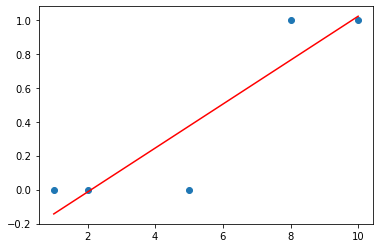

In [19]:
# logistic Regression이 필요한 이유
# (기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # 회귀식 도출

x = np.array([1,2,5,8,10]) # 공부 시간 
y = np.array([0,0,0,1,1])  # 0: fail / 1: pass 
lm = stats.linregress(x, y)
print('w값은 ', lm[0], 'b값은 ', lm[1])

plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

w값은  0.035005834305717624 b값은  0.17327887981330214


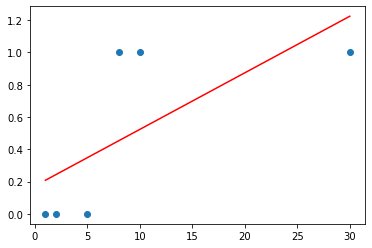

In [20]:
# logistic Regression이 필요한 이유
# (기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x, y)
print('w값은 ', lm[0], 'b값은 ', lm[1])

plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

# 그래프를 보면, 10시간을 공부한 학생이 fail로 출력된다.(정확한 결과 X)

In [21]:
# training data set 
x_data = np.array([[10,0], # [영어공부시간, 외국체류기간]
                   [8,1], 
                   [3,3], 
                   [2,3], 
                   [5,1], 
                   [2,0], 
                   [1,0]])
y_data = np.array([[1], [1], [1], [1], [0], [0], [0]])

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight(2행1열), bias(1개)
W = tf.Variable(tf.random_normal([2,1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost function
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], 
                          feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost: {}".format(step, cost_val))
        
# 학습이 잘 되었는지 확인하기 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # True True True True False True True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost: 0.3069683611392975
600번째 cost: 0.23626495897769928
900번째 cost: 0.2056274265050888
1200번째 cost: 0.18607977032661438
1500번째 cost: 0.17145724594593048
1800번째 cost: 0.15961284935474396
2100번째 cost: 0.14958128333091736
2400번째 cost: 0.14085206389427185
2700번째 cost: 0.13312235474586487
3000번째 cost: 0.12619540095329285
정확도:  1.0


In [22]:
# 예측 
print('H결과: ', sess.run(H, feed_dict={X:[[3,3]]}))
print('predict결과: ', sess.run(predict, feed_dict={X:[[3,3]]}))

H결과:  [[0.96434474]]
predict결과:  [[1.]]


# Multinomial Classification
- (3개 이상 그룹)

- 퀴즈1,2,3의 성적과, 출석에 따른 등급(A,B,C) 분류 

In [26]:
# training data set
x_data = [[10,7,8,5], # [퀴즈1, 퀴즈2, 퀴즈3, 출석]
          [8,8,9,4],
          [7,8,2,3],
          [6,3,9,3],
          [7,5,7,4],
          [3,5,6,2],
          [2,4,3,1]]
# 종속변수는 multinomial classification에서는 원핫인코딩
y_data =[[1, 0, 0], # 등급 - A[1,0,0] B[0,1,0] C[0,0,1]
         [1, 0, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 0, 1],
         [0, 0, 1]]

# placeholder 
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight(4행 3열) & bias(3개)
W = tf.Variable(tf.random_normal([4,3]), name='Weight')
b = tf.Variable(tf.random_normal([3]), name='bias')

# Hypothesis 
logits = tf.matmul(X,
                   W) + b 
H = tf.nn.softmax(logits) 
    # softmax: 분류분석 최종 단계에서 결과의 합이 1이 됨

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], 
                          feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost: {}".format(step, cost_val))

300번째 cost: 1.1297999620437622
600번째 cost: 0.8514543771743774
900번째 cost: 0.6267703771591187
1200번째 cost: 0.5330013632774353
1500번째 cost: 0.4872783124446869
1800번째 cost: 0.05524212121963501
2100번째 cost: 0.048843950033187866
2400번째 cost: 0.04478567838668823
2700번째 cost: 0.04168257489800453
3000번째 cost: 0.03914260491728783
3300번째 cost: 0.03698218613862991
3600번째 cost: 0.03509872034192085
3900번째 cost: 0.033428482711315155
4200번째 cost: 0.03192919120192528
4500번째 cost: 0.03057113103568554
4800번째 cost: 0.02933196909725666
5100번째 cost: 0.028194906190037727
5400번째 cost: 0.0271464716643095
5700번째 cost: 0.026175756007432938
6000번째 cost: 0.025273960083723068


In [27]:
# 예측 
result = sess.run(H, feed_dict={X:[[8,8,9,4]]})
print(result)
print(result.argmax(axis=1)) # 0번째 열만 1 

[[0.9779156  0.01945437 0.00262999]]
[0]


In [28]:
# accuracy 측정 
# H => 0.97 0.19 0.002을 경우 H.argmax => 0
# Y -> 1    0    0    을 경우 Y.argmax => 0
predict = tf.argmax(H, axis=1) # 어떤 열의 값이 제일 큰지 index 반환 
correct = tf.equal(predict, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})*100, '%')

100.0 %


# XOR

In [30]:
# training data set 
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0], [1], [1], [0]]

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
        
# accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False True False True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.7082635164260864
600번째 cost : 0.7033857107162476
900번째 cost : 0.7002269625663757
1200번째 cost : 0.6980524063110352
1500번째 cost : 0.6965451240539551
1800번째 cost : 0.6955007910728455
2100번째 cost : 0.6947778463363647
2400번째 cost : 0.6942774653434753
2700번째 cost : 0.6939313411712646
3000번째 cost : 0.6936916708946228
정확도:  0.5


In [31]:
# 예측 
predict = tf.cast(H > 0.5, dtype=tf.float32)
print(sess.run(predict, feed_dict={X:x_data}))

[[1.]
 [0.]
 [1.]
 [0.]]


# Deep Learning XOR 예제 

In [32]:
# training data set 
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0], [1], [1], [0]]

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer 추가 
# Weight & bias (layer1 = 입력 2개, 출력 4개)
W1 = tf.Variable(tf.random_normal([2,4]), name="weight1")
b1 = tf.Variable(tf.random_normal([4]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# Weight & bias (layer1 = 입력 4개, 출력 1개)
W2 = tf.Variable(tf.random_normal([4,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
        
# accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False True False True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.6970818638801575
600번째 cost : 0.6958577632904053
900번째 cost : 0.6949398517608643
1200번째 cost : 0.6940988898277283
1500번째 cost : 0.693313479423523
1800번째 cost : 0.6925742626190186
2100번째 cost : 0.691872775554657
2400번째 cost : 0.6912018656730652
2700번째 cost : 0.690554141998291
3000번째 cost : 0.6899234056472778
정확도:  0.5


In [33]:
# training data set 
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0], [1], [1], [0]]

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer 추가 
# Weight & bias (layer1 = 입력 2개, 출력 10개)
W1 = tf.Variable(tf.random_normal([2,10]), name="weight1")
b1 = tf.Variable(tf.random_normal([10]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# Weight & bias (layer2 = 입력 10개, 출력 20개)
W2 = tf.Variable(tf.random_normal([10,20]), name="weight2")
b2 = tf.Variable(tf.random_normal([20]), name="bias2")
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
# Weight & bias (layer3 = 입력 20개, 출력 10개)
W3 = tf.Variable(tf.random_normal([20,10]), name="weight3")
b3 = tf.Variable(tf.random_normal([10]), name="bias3")
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
# Weight & bias (output layer = 입력 10개, 출력 1개)
W4 = tf.Variable(tf.random_normal([10,1]), name="weight4")
b4 = tf.Variable(tf.random_normal([1]), name="bias4")

# Hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
        
# accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False True False True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.6999151110649109
600번째 cost : 0.6969732046127319
900번째 cost : 0.6943880319595337
1200번째 cost : 0.6920633316040039
1500번째 cost : 0.6899282932281494
1800번째 cost : 0.6879286766052246
2100번째 cost : 0.6860204935073853
2400번째 cost : 0.684167206287384
2700번째 cost : 0.6823363304138184
3000번째 cost : 0.6804980039596558
정확도:  0.75
